In [1]:
%matplotlib inline

## Questions from 601sp15

- Can you use Naive Bayes for a combination of discrete and real-values $X_{i}$?
- How can we easily model just 2 of n attributes as dependent?
- What does the decision surface of a Naive Bayes classifier look like?
- How would you select a subset of $X_{i}$'s?


based on http://scikit-learn.org/stable/modules/naive_bayes.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics, model_selection, naive_bayes

np.random.seed(sum(map(ord, "naive bayes")))

# Gaussian Naive Bayes
without crossvalidation

In [3]:
iris = datasets.load_iris()
gnb = naive_bayes.GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print('Number of mislabeled points out of a total {total} points : {mislabeled}'
      .format(
          total=iris.data.shape[0],
          mislabeled=(iris.target != y_pred).sum())
     )

Number of mislabeled points out of a total 150 points : 6


with crossvalidation

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris.data, iris.target, test_size=1/3, random_state=0)
clf = gnb.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Number of mislabeled points out of a total {total} points : {mislabeled}'
      .format(
          total=y_test.shape[0],
          mislabeled=(y_test != y_pred).sum())
     )

Number of mislabeled points out of a total 50 points : 2


## Plot Gaussian Naive Bayes Classifier
base on http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

In [5]:
h = .01  # step size in the mesh

def plot_classifier(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8);
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm);
    plt.xlabel('Sepal length');
    plt.ylabel('Sepal width');
    plt.xlim(xx.min(), xx.max());
    plt.ylim(yy.min(), yy.max());  

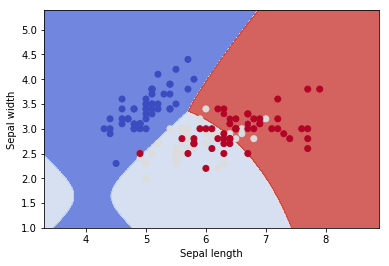

In [6]:
# we use only 2 from 4 features here to simplify visualization

clf = gnb.fit(X_train[:,:2], y_train)

# create a mesh to plot in
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target


plot_classifier(clf, X, y)

# Multinomial Naive Bayes
## Predict just random number
as you can see it doesn't work well, as it is expected

50.0% correct


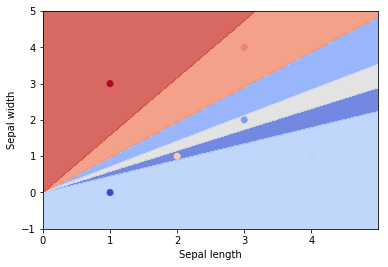

In [7]:
# multinomian naive bayes doesn't work for such small amount of features
X = np.random.randint(5, size=(6, 2))
y = np.array([1, 2, 3, 4, 5, 6])

clf = naive_bayes.MultinomialNB()
clf.fit(X, y)

print('{}% correct'.format(100 * sum(clf.predict(X) == y) / y.shape[0]))

plot_classifier(clf, X, y)

## Dataset: digits

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


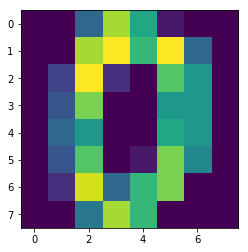

In [8]:
# try to predict digits
from sklearn import datasets

digits = datasets.load_digits()
print(digits.images[0])
plt.imshow(digits.images[0]);

In [9]:
flatten_images = digits.images.reshape((len(digits.images), -1))

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    flatten_images, digits.target, test_size=1/2, random_state=0)

clf = naive_bayes.MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print('train dataset size {}'.format( y_train.shape[0]))
print('test dataset size {}'.format( y_test.shape[0]))
print('precision {}%'.format(100 * sum(predicted == y_test) / y_test.shape[0]))

print('# Classification report for classifier')
print(metrics.classification_report(y_test, predicted))

print('# Confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

train dataset size 898
test dataset size 899
precision 89.32146829810901%
# Classification report for classifier
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        89
          1       0.88      0.70      0.78        90
          2       0.87      0.91      0.89        92
          3       1.00      0.83      0.91        93
          4       0.96      0.95      0.95        76
          5       0.97      0.84      0.90       108
          6       0.96      0.97      0.96        89
          7       0.88      1.00      0.93        78
          8       0.84      0.87      0.86        92
          9       0.69      0.91      0.79        92

avg / total       0.90      0.89      0.89       899

# Confusion matrix
[[88  0  0  0  1  0  0  0  0  0]
 [ 0 63 12  0  0  1  2  0  2 10]
 [ 1  2 84  0  0  0  0  0  4  1]
 [ 0  0  1 77  0  0  0  2  5  8]
 [ 0  0  0  0 72  0  0  3  1  0]
 [ 0  0  0  0  1 91  1  1  0 14]
 [ 0  1  0  0  1  1 86  0  0  0

## Dataset: The 20 newsgroups
based on http://scikit-learn.org/stable/datasets/twenty_newsgroups.html

### About dataset

In [10]:
from pprint import pprint

newsgroups_train = datasets.fetch_20newsgroups(subset='train')
pprint(list(newsgroups_train.target_names))
print(newsgroups_train.filenames.shape)
print(newsgroups_train.target.shape)
print(newsgroups_train.data[0])
print(newsgroups_train.target[:10])


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
(11314,)
(11314,)
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made,

### Preprocessing newsgroups
#### TF-IDF
https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [11]:
from sklearn.feature_extraction import text
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=categories)
vectorizer = text.TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
print('shape {}'.format(vectors.shape))
print('average non zero components {}'.format(vectors.nnz / float(vectors.shape[0])))

shape (2034, 34118)
average non zero components 159.0132743362832


#### Clean dataset by strip metadata information
first try without striping

In [12]:
newsgroups_test = datasets.fetch_20newsgroups(subset='test', 
                                              categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)
clf = naive_bayes.MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)
predicted = clf.predict(vectors_test)

print('# f1 score')
print(metrics.f1_score(newsgroups_test.target, predicted, average='macro'))

print('# Classification report for classifier')
print(metrics.classification_report(newsgroups_test.target, predicted))

print('# Confusion matrix')
print(metrics.confusion_matrix(newsgroups_test.target, predicted))

def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.coef_[i])[-10:]
        print('[{}]:\n{}\n'.format(category, ', '.join(feature_names[top10])))

show_top10(clf, vectorizer, newsgroups_train.target_names)


# f1 score
0.882135924027
# Classification report for classifier
             precision    recall  f1-score   support

          0       0.84      0.86      0.85       319
          1       0.95      0.95      0.95       389
          2       0.91      0.96      0.93       394
          3       0.85      0.76      0.80       251

avg / total       0.89      0.89      0.89      1353

# Confusion matrix
[[274   2   9  34]
 [  5 368  16   0]
 [  2  15 377   0]
 [ 47   3  11 190]]
[alt.atheism]:
edu, it, and, in, you, that, is, of, to, the

[comp.graphics]:
edu, in, graphics, it, is, for, and, of, to, the

[sci.space]:
edu, it, that, is, in, and, space, to, of, the

[talk.religion.misc]:
not, it, you, in, is, that, and, to, of, the



**then try to strip**

# TODO: discover vectorization TF-idf
it should gives lower weight to very common for each category words and high for more specific.
But as we see we have very similar list of top popular words.
Maybe I'm doing something wrong?

*present one message in different way*

In [13]:
# TODO: show words with higher coefs
feature_names = np.asarray(vectorizer.get_feature_names())

# get N-message
i=100
# sort message vector
print(np.sort(vectors_test.data[vectors_test.indptr[i]:vectors_test.indptr[i+1]]))
print(feature_names[vectors_test.indices[np.argsort(vectors_test.data[vectors_test.indptr[i]:vectors_test.indptr[i+1]])]])
print(newsgroups_test.data[i])

[ 0.01510111  0.01510854  0.01574543  0.01779956  0.0186857   0.01938865
  0.01988973  0.02342079  0.02364125  0.02518015  0.02560556  0.0299747
  0.03020223  0.03335963  0.03341911  0.03417798  0.03925419  0.04004973
  0.04181387  0.04511527  0.04763525  0.04890275  0.04981754  0.05369437
  0.05541341  0.05573817  0.05747585  0.05759912  0.05772341  0.05930062
  0.05986521  0.06121845  0.06360443  0.06439388  0.0647463   0.0647463
  0.06481111  0.06734143  0.07929528  0.08094431  0.08369146  0.0841662
  0.08416951  0.0849063   0.08505349  0.08649736  0.08649736  0.08736052
  0.09029249  0.0914116   0.09393431  0.0953736   0.0953736   0.0953736
  0.0953736   0.0953736   0.09874331  0.1032842   0.11355493  0.11355493
  0.1196779   0.1196779   0.1196779   0.13499927  0.14213858  0.14486723
  0.16404517  0.16693402  0.17299472  0.18058498  0.19074719  0.20151957
  0.2393558   0.2393558   0.3396252   0.45421971]
['nntp' 'watson' 'express' 'wang' 'site' 'host' 'subject' 'usa'
 'communicatio

### remove headers

In [32]:
def print_scores(target, pred):
    print('-'*80)
    print('# f1 score (macro):')
    print(metrics.f1_score(target, pred, average='macro'))

    print('-'*80)
    print('# Classification report for classifier:')
    print(metrics.classification_report(target, pred))

    print('-'*80)
    print('# Confusion matrix:')
    print(metrics.confusion_matrix(target, pred))
    
vectorizer = text.TfidfVectorizer()

newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                                               remove=('headers', 'footers', 'quotes'),
                                               categories=categories)
vectors_train = vectorizer.fit_transform(newsgroups_train.data)

newsgroups_test = datasets.fetch_20newsgroups(subset='test',
                                              remove=('headers', 'footers', 'quotes'),
                                              categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)

clf = naive_bayes.MultinomialNB(alpha=.01)
clf.fit(vectors_train, newsgroups_train.target)

pred = clf.predict(vectors_test)

print_scores(newsgroups_test.target, pred)
show_top10(clf, vectorizer, newsgroups_train.target_names)

--------------------------------------------------------------------------------
# f1 score (macro):
0.769951751845
--------------------------------------------------------------------------------
# Classification report for classifier:
             precision    recall  f1-score   support

          0       0.68      0.68      0.68       319
          1       0.92      0.89      0.91       389
          2       0.81      0.90      0.85       394
          3       0.68      0.60      0.64       251

avg / total       0.79      0.79      0.79      1353

--------------------------------------------------------------------------------
# Confusion matrix:
[[217   6  33  63]
 [ 10 348  28   3]
 [ 17  17 355   5]
 [ 73   7  21 150]]
[alt.atheism]:
not, in, and, it, you, is, that, of, to, the

[comp.graphics]:
graphics, you, in, it, is, for, of, and, to, the

[sci.space]:
for, that, it, space, is, in, and, of, to, the

[talk.religion.misc]:
not, it, in, you, is, and, that, to, of, the



In [33]:
vectorizer = text.TfidfVectorizer(stop_words='english')

newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                                               remove=('headers', 'footers', 'quotes'),
                                               
                                               categories=categories)
vectors_train = vectorizer.fit_transform(newsgroups_train.data)

newsgroups_test = datasets.fetch_20newsgroups(subset='test',
                                              remove=('headers', 'footers', 'quotes'),
                                              categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)

clf = naive_bayes.MultinomialNB(alpha=.01)
clf.fit(vectors_train, newsgroups_train.target)

pred = clf.predict(vectors_test)

print_scores(newsgroups_test.target, pred)
show_top10(clf, vectorizer, newsgroups_train.target_names)

--------------------------------------------------------------------------------
# f1 score (macro):
0.766080522971
--------------------------------------------------------------------------------
# Classification report for classifier:
             precision    recall  f1-score   support

          0       0.68      0.66      0.67       319
          1       0.92      0.89      0.90       389
          2       0.80      0.90      0.85       394
          3       0.68      0.61      0.64       251

avg / total       0.78      0.79      0.78      1353

--------------------------------------------------------------------------------
# Confusion matrix:
[[209   9  35  66]
 [ 10 346  30   3]
 [ 18  16 355   5]
 [ 69   7  21 154]]
[alt.atheism]:
islam, does, religion, atheism, say, just, think, don, people, god

[comp.graphics]:
windows, does, looking, program, know, file, image, files, thanks, graphics

[sci.space]:
earth, think, shuttle, orbit, moon, just, launch, like, nasa, space

[talk